In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dataframe = pd.read_csv(r'C:\Users\aacjp\KC_Final.csv')
add_in = pd.read_csv(r'C:\Users\aacjp\frm_seattle.csv')

In [17]:
df = pd.concat([dataframe, add_in], axis='columns')
df

,price,sqft_lot,waterfront,lat,has_basement,sqft_living,zip_density,distance
0,221900.0,0.374187,0.0,0.5112,0,0.567220,0.661690,7.2
1,538000.0,0.479621,0.0,0.7210,1,1.235386,0.587569,8.2
2,180000.0,0.662278,0.0,0.7379,0,0.370135,0.955798,10.4
3,604000.0,0.331139,0.0,0.5208,1,0.942162,0.011237,6.4
4,510000.0,0.535120,0.0,0.6168,0,0.807567,2.937626,13.3
...,...,...,...,...,...,...,...,...
20526,360000.0,0.074904,0.0,0.6993,0,0.735463,0.472173,6.7
20527,400000.0,0.384982,0.0,0.5107,0,1.110405,0.935701,6.5
20528,402101.0,0.089407,0.0,0.5944,0,0.490309,0.798696,1.6
20529,400000.0,0.158152,0.0,0.5345,0,0.769112,2.140444,13.1


# Checking for Multicollinearity
we still have a little bit with area and lattitude, it is best to keep all values under 5, but it is worth the increased accuracy.

In [40]:
X = df.drop(['price', 'lat'], axis='columns')

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

sqft_lot        1.213169
waterfront      1.003706
has_basement    1.703567
sqft_living     5.252351
zip_density     2.430823
distance        3.894907
dtype: float64

# Building a Linear Regression Model with Statsmodels

Doing a train test split first.

In [41]:
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
train_df = pd.concat([X_train, y_train], axis='columns')

In [42]:
f = 'price~sqft_lot+waterfront+has_basement+sqft_living+zip_density-1'

In [43]:
predictor = ols(formula=f, data=train_df).fit()

In [44]:
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          2.631e+04
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:08:48   Log-Likelihood:                     -2.0727e+05
No. Observations:               15398   AIC:                                  4.145e+05
Df Residuals:                   15393   BIC:                                  4.146e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_lot      -172.5280    530.099     -0.325      0.745   -1211.585     866.529
waterfront    2.321e+05   2.59e+04      8.951      0.000    1.81e+05    2.83e+05
has_basement  3.165e+04   2863.118     11.054      0.000     2.6e+04    3.73e+04
sqft_living   4.348e+05   2342.934    185.598      0.000     4.3e+05    4.39e+05
zip_density   3.907e+04   1639.988     23.822      0.000    3.59e+04    4.23e+04
==============================================================================
Omnibus:                      461.923   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.210
Skew:                           0.385   Prob(JB):                    1.11e-118
Kurtosis:                       3.503   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

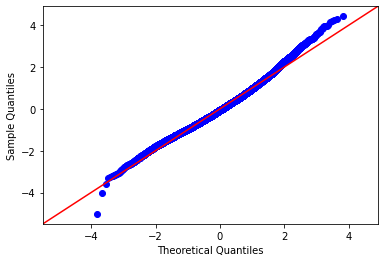

In [45]:
fig = sm.graphics.qqplot(predictor.resid, dist=stats.norm, line='45', fit=True)

In [46]:
x_cols = list(X_train.columns)

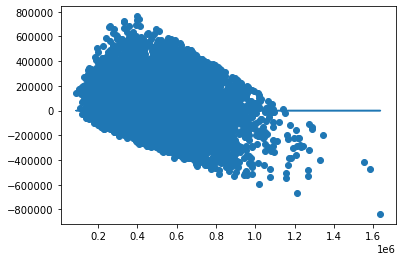

In [47]:
plt.scatter(predictor.predict(X_train[x_cols]), predictor.resid)
plt.plot(predictor.predict(X_train[x_cols]), [0 for i in range(len(X_train))]);

# Putting results in a table

In [48]:
results = pd.DataFrame(list(predictor.predict(X_test)))
results.columns = ['Predicted Price']
results['Actual Price'] = list(y_test)

In [49]:
te = []
pe = []
for i in range(len(results)):
    if results['Actual Price'][i] > results['Predicted Price'][i]:
        te.append(round(results['Actual Price'][i] - results['Predicted Price'][i], 2))
        pe.append(round(((results['Actual Price'][i] / results['Predicted Price'][i])-1)*100, 2))
    else:
        te.append(round(results['Predicted Price'][i] - results['Actual Price'][i], 2))
        pe.append(round(((results['Predicted Price'][i] / results['Actual Price'][i])-1)*100, 2))

In [50]:
results['$ Error'] = te
results['% Error'] = pe
results

,Predicted Price,Actual Price,$ Error,% Error
0,649943.171355,607500.0,42443.17,6.99
1,504204.515042,335000.0,169204.52,50.51
2,325566.719332,167000.0,158566.72,94.95
3,279119.517706,265000.0,14119.52,5.33
4,194685.833106,550000.0,355314.17,182.51
...,...,...,...,...
5128,972188.621027,795127.0,177061.62,22.27
5129,297524.983961,274800.0,22724.98,8.27
5130,239829.036078,218000.0,21829.04,10.01
5131,432421.089244,335000.0,97421.09,29.08
